# ANÁLISE DE DADOS SOBRE TIMES NORDESTINOS

PARTICIPANTES:
- Kevin Leandro Gomes 
- Harley Adisson Moreira Carneiro
- Ednaldo Martins da Silva Neto


## Introdução:
    
O projeto foi desenvolvido com o intuito de esclarecer dúvidas sobre alguns times do nordeste, pois sempre surgem muitas incertezas sobre quantas participações em determinadas competições, quantos títulos em determinados anos e etc. Então  baseado nisso resolvemos fazer uma análise de dados o mais detalhada possível sobre quatro perguntas escolhidas para serem respondidas.
Esse projeto tem o objetivo de ajudar pessoas a esclarecerem suas dúvidas sobre alguns aspectos do seu time do coração.
    

## Dados usados:

   O Dataset do projeto foi criado para a análise de doze times do nordeste, independete da história de cada um eles foram
analisados imparcialmente e cuidadosamente para assim conseguirmos obter os resultados o mais precisos possíveis.
   Dentre os times que foram analisados estão. **ABC de Natal, América de Natal, Botafogo PB, Bahia, Ceará, Confiança, 
Flamengo do Piauí, Fortaleza, Náutico, Sampaio Correa, Santa Cruz, Sport, Treze PB e o Vitória.**

In [1]:
import pandas as pd
times = pd.read_csv("dadosnordestinos.csv")
times

,TIMES,TÍTULOS (2010-2019),P/LIBERTADORES (2009-2019),P/SÉRIE A (2010-2019)
0,ABC DE NATAL,7,0,0
1,AMÉRICA DE NATAL,4,0,0
2,BOTAFOGO PB,7,0,0
3,BAHIA,6,0,7
4,CEARÁ,6,0,4
5,CONFIANÇA,4,0,0
6,FLAMENGO DO PIAUÍ,0,0,0
7,FORTALEZA,6,0,1
8,NÁUTICO,3,0,2
9,SAMPAIO CORREA,7,0,0


## Pré-processamento 
**Não houve limpeza e transformação de dados pois na base de dados não havia informações falsas ou faltantes já que foram extraidas de fontes oficiais dos times**

## Perguntas

 ### O projeto teve como objetivo responder 3 perguntas 
   
   1. *Qual o clube nordestino com maior participação na série A do campeonato brasileiro nos últimos 9 anos?*

In [28]:
times.sort_values(by="P/SÉRIE A (2010-2019)", ascending = False)[["TIMES","P/SÉRIE A (2010-2019)"]]

,TIMES,P/SÉRIE A (2010-2019)
3,BAHIA,7
11,SPORT,6
13,VITÓRIA,5
4,CEARÁ,4
8,NÁUTICO,2
7,FORTALEZA,1
10,SANTA CRUZ,1
0,ABC DE NATAL,0
1,AMÉRICA DE NATAL,0
2,BOTAFOGO PB,0


Fica claro que o time com mais participações na série a do campeonato brasileiro é o **BAHIA**, contudo poderiamos ter conseguido essa informação pela função   

```times.loc[times["P/SÉRIE A (2010-2019)"]>=max][["TIMES","P/SÉRIE A (2010-2019"]]```

   2. *Em relação a títulos, qual o clube do nordestino mais vitorioso nos últimos 9 anos?(Levamos em consideração todos os títulos oficiais de campeonatos maiores ou menores)*
   

In [31]:
times.loc[times["TÍTULOS (2010-2019)"]>=max][["TIMES","TÍTULOS (2010-2019)"]]

,TIMES,TÍTULOS (2010-2019)
0,ABC DE NATAL,7
2,BOTAFOGO PB,7
9,SAMPAIO CORREA,7
10,SANTA CRUZ,7


Desta vez usamos a função .loc para exemplificar a mesma contudo achamos  um empate técnico entre titulos com os times 
- ABC DE NATAL
- BOTAFOGO PB 
- SAMPAIO CORREA 
- SANTA CRUZ


*Lembrando que não há distinção do tamanho do campeonato, por exemplo o campeonato brasileiro tem o mesmo peso do campeonato paraibano*

3. Qual o clube nordestino com a maior quantidade de participações na Copa Libertadores nos últimos 10 anos?


In [33]:
times.sort_values(by="P/LIBERTADORES (2009-2019)", ascending = False)[["TIMES","P/LIBERTADORES (2009-2019)"]]

,TIMES,P/LIBERTADORES (2009-2019)
11,SPORT,1
0,ABC DE NATAL,0
1,AMÉRICA DE NATAL,0
2,BOTAFOGO PB,0
3,BAHIA,0
4,CEARÁ,0
5,CONFIANÇA,0
6,FLAMENGO DO PIAUÍ,0
7,FORTALEZA,0
8,NÁUTICO,0


Sendo assim fica evidente que o time nordestino com mais participações na libertadores foi o 
- Sport 
com uma(1) participação

## Pergunta extra:
Como não usamos até agora regressão linear decidimos fazer uma pergunta extra
- Usando nosso dataset e regressõa linear quantos titulos normalmente um time com 0 participações na série A terá?

Começamos fazendo um gráfico de dispersão para ilustra o quão distante um time pode estar do outro

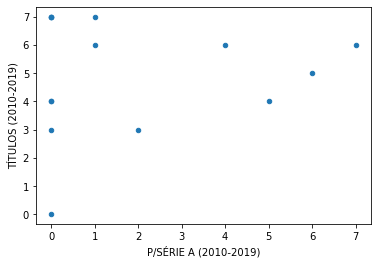

In [47]:
times.plot.scatter(x= "P/SÉRIE A (2010-2019)",y = "TÍTULOS (2010-2019)")

Agora iremos usar a regressão para tentar adivinhar quantos títulos um time com zero participaçoes na série A normalmente teria

In [49]:
result = linregress(times["P/SÉRIE A (2010-2019)"], times["TÍTULOS (2010-2019)"])
a = result.slope
b = result.intercept
def predict(p_serie_a):
    return p_serie_a*a+b
predict(0)

4.776450511945392

Sendo assim um time nordestino incluido na base de dados sem nenhuma participação na série A entre 2010 e 2009 teria em média um pouco menos de cinco titulos

## Conclusão:

Chegamos a conclusão que o uso das técnicas de analise de dados pelos cientistas da área já são valiosos nos dias atuais e com certeza só tende a continuar cada vez mais sendo valorizado. Entramos com várias dúvidas sobre os clubes analisados e conseguimos sair com todas as respostas que foram propostas a serem respondidas, com uma análise de dados simples podem-se resolver inúmeros tipos de problemas e questionamentos. Foram utilizados dados de vários clubes do nordeste e foram também respondidos alguns questionamentos sobre eles, o resultado e a experiência com a realização desse projeto foram excelentes, descobrimos uma nova ferramenta de trabalho chamada Jupyter Notebook, ferramneta essa que é específica para o uso dos ciêntistas de dados.
Concluímos novamente que com a análise de dados sendo realizada de forma correta e com o conhecimento de todas técnicas a busca por resultados cada vez mais precisos para serão ainda mais eficazes do que já são nos dias atuais, essa área acaba sendo a opção  mais promissora da tecnologia em um futuro próximo, tendo cada vez mais requerimento por empresas e afins.